<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/CE725_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1(a)

In [1]:
import numpy as np
import pandas as pd

In [5]:
df_disp = pd.read_csv("/content/drive/MyDrive/CE725/HW1_Q1_Displacement_Measurements.txt", sep=" ", header=None, 
                 names=["Time", "ux", "uy"])
df_velo = pd.read_csv("/content/drive/MyDrive/CE725/HW1_Q1_Velocity_Measurements.txt", sep = " ", header=None,
                      names=["Time", "vx", "vy"])

In [13]:
n = len(df_disp)
df_disp.head()

,Time,ux,uy
0,0.00,-2.183552,-4.166413
1,0.01,-0.339776,5.535855
2,0.02,7.229734,-14.858519
3,0.03,9.255268,-4.889382
4,0.04,6.778473,12.389312


In [7]:
df_velo.head()

,Time,vx,vy
0,0.00,68.845426,120.690920
1,0.01,72.477308,119.307053
2,0.02,72.195585,106.567229
3,0.03,69.504471,121.888917
4,0.04,68.817587,118.532213


In [11]:
X_00 = [300,100,200,60]
R = np.eye(2)*100
P_00 = np.eye(4)*1e4
X = X_00
P = P_00

In [12]:
Q = np.zeros((4,4))
A = np.array([[1, 0.01,0,0],[0, 1,0,0],[0, 0,1,0.01],[0,0,0,1]])
B = np.array([[0,0,0,0],[0,0,0,0],[0,0,1,0],[0,0,0,1]])
C = np.array([[1, 0,0,0],[0,0,1,0]])

In [14]:
u = np.zeros((n, 4))
for i in range(n):
    u[i] = [0 ,0 ,-9.8*0.01*0.01*0.5,-9.8*0.01]

In [15]:
x_list = np.zeros((n, 4))
P_list = np.zeros((n, 4, 4))
tm  = np.array(df_disp['Time'])
dt = df_disp.drop('Time',axis=1)
y = np.array(dt)

In [29]:
for i in range(n):
    x_pred = A.dot(X) + B.dot(u[i])
    P_pred = A.dot(P).dot(A.T) + Q
    
    K = P_pred.dot(C.T).dot(np.linalg.inv(C.dot(P_pred).dot(C.T) + R))
    X = x_pred + K.dot(y[i] - C.dot(x_pred))
    P = (np.eye(4) - K.dot(C)).dot(P_pred)
    
    x_list[i] = X.T
    P_list[i] = P

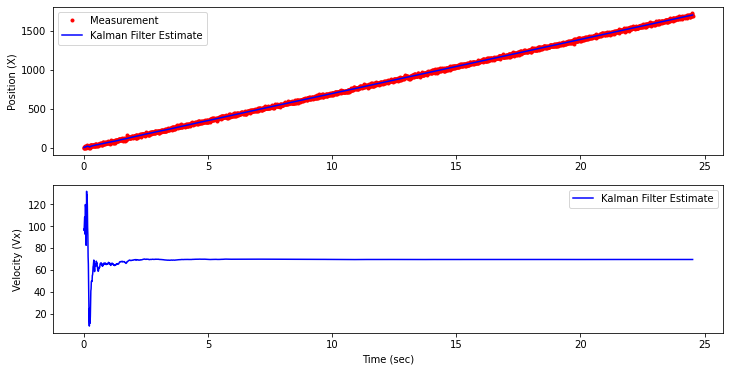

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(tm, y[:,0], 'r.', label='Measurement')
plt.plot(tm, x_list[:, 0], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.ylabel('Position (X)')

plt.subplot(212)
plt.plot(tm, x_list[:, 1], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (Vx)')
plt.show()

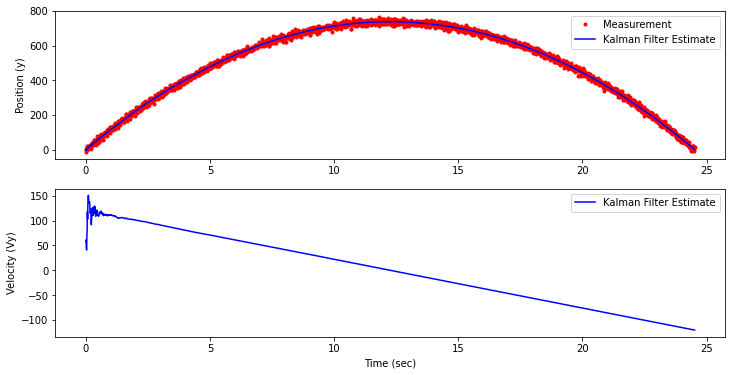

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(tm, y[:,1], 'r.', label='Measurement')
plt.plot(tm, x_list[:, 2], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.ylabel('Position (y)')

plt.subplot(212)
plt.plot(tm, x_list[:,3 ], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (Vy)')



plt.show()

In [32]:
#now taking P0,0 = I4*10^8
P_00 = np.eye(4)*1e4

In [33]:
X = X_00
P = P_00

In [34]:
x_list = np.zeros((n, 4))
P_list = np.zeros((n, 4, 4))

In [38]:
for i in range(n):
    x_pred = A.dot(X) + B.dot(u[i])
    P_pred = A.dot(P).dot(A.T) + Q
    
    K = P_pred.dot(C.T).dot(np.linalg.inv(C.dot(P_pred).dot(C.T) + R))
    X = x_pred + K.dot(y[i] - C.dot(x_pred))
    P = (np.eye(4) - K.dot(C)).dot(P_pred)
    
    x_list[i] = X.T
    P_list[i] = P

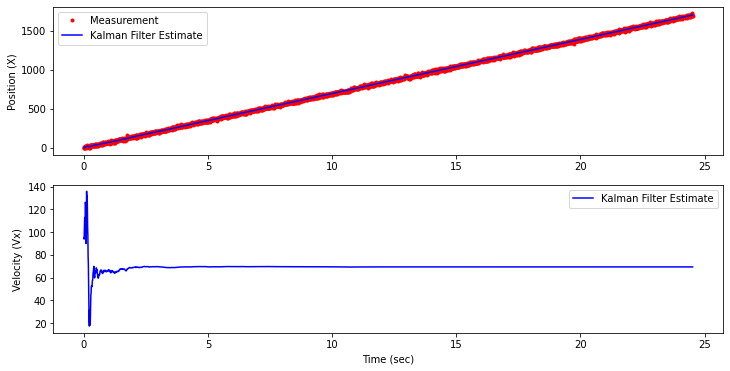

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(tm, y[:,0], 'r.', label='Measurement')
plt.plot(tm, x_list[:, 0], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.ylabel('Position (X)')

plt.subplot(212)
plt.plot(tm, x_list[:, 1], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (Vx)')
plt.show()

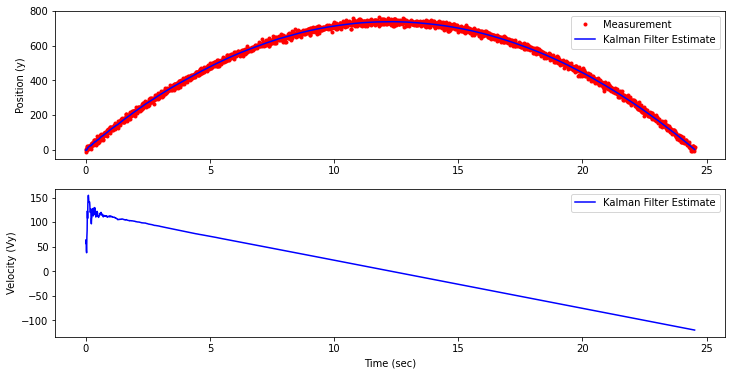

In [40]:
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(tm, y[:,1], 'r.', label='Measurement')
plt.plot(tm, x_list[:, 2], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.ylabel('Position (y)')

plt.subplot(212)
plt.plot(tm, x_list[:,3 ], 'b-', label='Kalman Filter Estimate')
plt.legend()
plt.xlabel('Time (sec)')
plt.ylabel('Velocity (Vy)')



plt.show()